<a href="https://colab.research.google.com/github/efad-dip/Efad/blob/main/Al_Efad(1069)%20assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generated Dataset: [74 67 62 65 73 65 69 71 65 67 64 66]
Sample Mean: 67.33
Hypothesized Population Mean: 65
t-Statistic: 2.18
Degrees of Freedom: 11
p-Value: 0.0515
95% Confidence Interval: [64.98, 69.68]
Fail to reject H0 → The average score is not significantly different from 65.


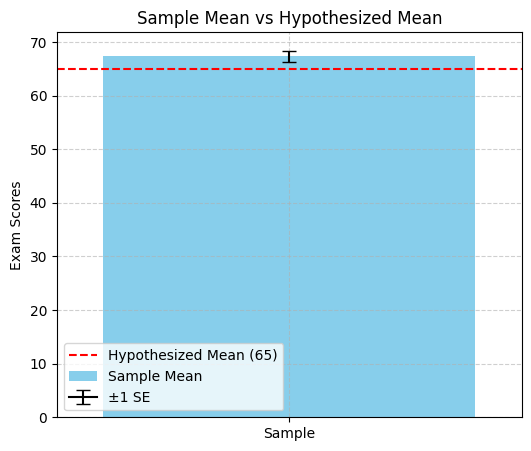

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Step 1: Generate the dataset

# Rule: dataset = 60 + randint(0, 15, size=12) + (k % 5)
# Example: Suppose last two digits of ID = 27 --> k = 27
# Then (k % 5) = 2
k = 27
np.random.seed(0)   # for reproducibility
data = 60 + np.random.randint(0, 15, size=12) + (k % 5)

print("Generated Dataset:", data)


# Step 2: Define the hypothesis

# H0: μ = 65 (population mean = 65)
# H1: μ ≠ 65 (population mean is different from 65)
population_mean = 65


# Step 3: Perform one-sample t-test

t_statistic, p_value = stats.ttest_1samp(data, population_mean)


# Step 4: Confidence Interval (95%)

ci = stats.t.interval(
    0.95,                      # confidence level
    df=len(data)-1,            # degrees of freedom
    loc=np.mean(data),         # sample mean
    scale=stats.sem(data)      # standard error of mean
)


# Step 5: Display results

print(f"Sample Mean: {np.mean(data):.2f}")
print(f"Hypothesized Population Mean: {population_mean}")
print(f"t-Statistic: {t_statistic:.2f}")
print(f"Degrees of Freedom: {len(data)-1}")
print(f"p-Value: {p_value:.4f}")
print(f"95% Confidence Interval: [{ci[0]:.2f}, {ci[1]:.2f}]")


# Step 6: Decision

alpha = 0.05
if p_value < alpha:
    print(f"Reject H0 → The average score is significantly different from {population_mean}.")
else:
    print(f"Fail to reject H0 → The average score is not significantly different from {population_mean}.")


# Step 7: Visualization

plt.figure(figsize=(6,5))
plt.bar(1, np.mean(data), color="skyblue", label='Sample Mean')
plt.errorbar(1, np.mean(data), yerr=stats.sem(data), fmt='k', linewidth=1.5, capsize=5, label='±1 SE')
plt.axhline(y=population_mean, color='r', linestyle='--', linewidth=1.5, label='Hypothesized Mean (65)')
plt.title('Sample Mean vs Hypothesized Mean')
plt.xlim(0.5,1.5)
plt.xticks([1], ["Sample"])
plt.ylabel('Exam Scores')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
